In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import regex as re
import src.cleanfun as cf
import plotly.express as px
import plotly.express as px
import plotly.graph_objects as go

In [56]:
#configuracioens de visualización
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

sns.set_context = ("poster")
sns.set(rc={"figure.figsize":(12.,6.)})
sns.set_style("whitegrid")
sns.color_palette("husl", 8)


[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

In [57]:
sharks = pd.read_csv("data/sharks.csv")

In [58]:
sharks.columns

Index(['Unnamed: 0', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Year_D', 'Month_D', 'Act', 'Boat', 'Injur_Type', 'Spec'],
      dtype='object')

# Hipótesis
- hipotesis 1 los ataques de tiburones han icrmentado según han ido avanzando los años
- hipótesis 2 los ataquesde tiburones atacan más a embarcaciones que a nadadores
- [hipóstesis 3 Florida es la capital mundial de los ataques de tiburones](https://www.lavanguardia.com/ocio/viajes/20210407/6631447/6-playas-mas-peligrosas-mundo.html)
- [hipótesis 4 ¿Es posible el ataque de tiburón en la costa española?](https://www.mundo-geo.es/naturaleza/es-posible-ataque-tiburon-en-costa-espanola_238643_102.html)

## hipotesis 1 los ataques de tiburones han icrmentado según han ido avanzando los años

In [59]:
anual = sharks[(sharks.Year_D != "UNKNOWN")]

In [60]:
anual.Year_D.value_counts()

2015    130
2016    122
2017    122
2014    119
2011    118
       ... 
1792      1
1791      1
1787      1
1786      1
1543      1
Name: Year_D, Length: 240, dtype: int64

anual = sharks[(sharks["Year_D"] > '1950')&(sharks.Year_D != "UNKNOWN")]

anual["Year_D"].value_counts()

#fig = px.bar(penguins, x=penguins.species.value_counts().index, y=penguins.species.value_counts().values)

fig = px.line(anual, x=anual["Year_D"].value_counts().index, y=anual["Year_D"].value_counts().values)

fig.show()

/home/sinatxe/anaconda3/envs/ironhack/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



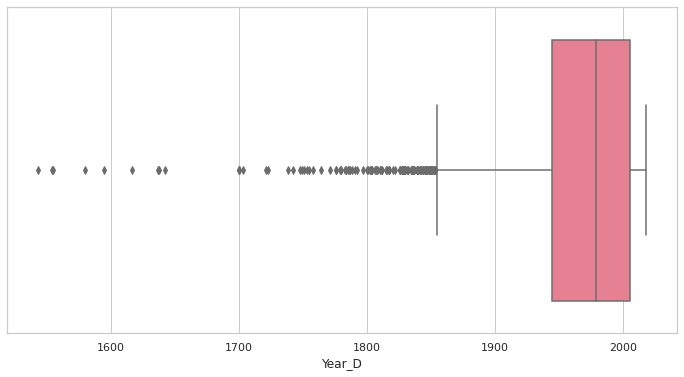

In [62]:
#mostrar outlayers para dejar fuera esos datos si fuera necesario
#attacks_Year.Year_D = attacks_Year.Year_D.astype(dtype="int64")
#sns.boxplot(x="Year_D", data = attacks_Year,palette ="husl");
anual.Year_D = anual.Year_D.astype(dtype = "int64")
sns.boxplot(x = "Year_D",data = anual,palette ="husl");

In [64]:
#el gráfico anterior muestra que el grueso de ataques empieza sobre 1950
#df2 = df[df["region"] == "Boston"]
anual = anual[anual.Year_D > 1950]
attacks_Year= anual.groupby('Year_D')['Activity'].count().reset_index()
attacks_Year
fig = px.line(attacks_Year,x="Year_D", y ="Activity")

In [65]:
fig.show()

In [69]:
#utlizaremos los datos a partir de 1950 porque es dónde más se concetran los ataques de tiburón
fig = px.histogram(attacks_Year,x="Year_D",y = "Activity")
fig.update_layout(bargap=0.01)
fig.add_vline(attacks_Year.Year_D.median(), line_width=3, line_dash="dash", line_color="red")
fig.add_vline(attacks_Year.Year_D.mean(), line_width=3, line_dash="dash", line_color="green")
fig.show()

## hipótesis 2 los ataquesde tiburones atacan más a embarcaciones que a nadadores

#### 

In [ ]:
Tipo = anual.groupby("Type")["Activity"].count().reset_index()
Tipo

In [ ]:
fig = px.histogram(Tipo, x="Type", y= "Activity", color = "Activity")
fig.show()